                                                                 Grup Üyeleri: Ömer Zahid Kara(G191210070) - İbrahim Özmen(G191210010) 2A 
# İçerik
### -- Hakkında
### -- Deep-Q Learning
### -- Kod

# Proje Hakkında
-Proje adı: Deep Q-Learning for Atari Breakout

-Model Kaynak: https://keras.io/examples/rl/deep_q_network_breakout/#train. Breakout atari oyunu oynayan bir ajanın deep-q learning algoritmasıyla eğitilmesidir.

-Kaynakta belirtildiği üzere programda ilk olarak gymnasium kütüphanesinden alınan Breakout ortamı için belirli konfigürasyonlar ve eğitim parametrelerinden epsilon,gamma,max ve min epsilon değerleri tanımlanmıştır.
Epsilon değeri ajanın rastgele hareket seçme olasılığını belirtmekte ve 0-1 aralığında olabilmektedir. Eğitim sürecinde bu değer 1 olarak başlatılır, eğitim sonuçlarını görmek için ise min epsilon ile aynı değere getirilir.
Böylece Q tablosu ve ajanın kaydettiği ağırlıklar yüksek olasılıkta gözlenmiş olur. Eğitim sırasında "env = gym.make("BreakoutNoFrameskip-v4", render_mode="human")" kodu içeriğinde render mode kaldırıldı. Bu oyunun penceresini pasif hale getirir. Oyun yaklaşık 8 mod içermekte ve yine "env = gym.make("BreakoutNoFrameskip-v4",mode = 0, render_mode="human")" kodu içerisinde default mode 0 yerini 4 ün katları olacak şekilde değiştirerek modları yükleyebilmekteyiz.

-Kaynak modelde ajanın ağırlık dosyasını oluşturup kaydeden kod ibareleri bulunmamakta dolayısıyla bu kodları ekledik. Model .weights.h5 uzantılı dosyayı alıp ona göre eğitimini ilerletmektedir.
Eğitim sürecinin gözlemlenmesi için epsilon değeri 2 episondda bir ekrana yazdırılıyor. Epsilon değeri başlangıçta 1 den başlar ve yaklaşık 200 bin karede 0.1 düşürülür. Eğitim devam ettikçe ajanın rastgele aksiyon alması olasıığı düşürülür. Kaynakta önerilen süre 30 saattir. Projemizde 10 saat eğitim sürecinden geçmiş ağırlık dosyasını bulundurmaktayız. Bu ağırlıklarla model erken-eğitim sürecindeki gibi davranmaktadır. Rastgele gibi görünen ama oyunun başlangıcında topun kenarlara atılmasından dolayı daha çok kenarları tercih eden davranışlar sergilemektedir. Topu düşürmemenin ödülünü tam olarak kapsamamış olduğu için ortalama 4 puan alabildi. Eğitim süreci ilerlerken uzun süre boyunca pek ilerleme gösterememesine karşın kısa sürede çok gelişme gösterdi. Deep q learning işleyişine göre çok sayıda veri, tabloda ayrıntılı olarak çok sayıda adımda küçük değişikliklerle test edilir. Dolayısıyla tamamen iyi hale gelebilmek için genelde uzun süre eğitime ihtiyaç duyar.

### Projenin denenmesi için Breakout.weights.h5 dosyası aynı dizinde olmalı. Eğitim için epsilon değeri 1.0 seçilmeli. Eğitim sonuçlarını görmek için "render mode = human" seçilmeli ve epsilon değeri  0.1 veya daha düşük değere getirilmelidir(min epsilon da aynı olmalıdır).

Eğitimli : https://i.imgur.com/X8ghdpL.gif

Eğitimsiz: https://i.imgur.com/rRxXF4H.gif

# Derin Q-Öğrenmesi
    Pekiştirmeli öğrenme algoritmalarının bir türü olan Derin Q Ağları (DQN), Q-öğrenme algoritmasına dayanmaktadır ve pekiştirmeli öğrenmede kullanılır. Q-öğrenme algoritmasında, ajan her iterasyonda kazandığı tecrübeleri, ödüle giderken elde edebileceği toplam ödülü en çoklamak yani maksimize etmek için kullanır. Bu deneyimleri Q tablosu olarak adlandırılan bir tabloda tutmaktadır. Ajanın başlangıçta hiçbir deneyimi olmadığı için Q-tablosu sıfırlarla doludur. Bu nedenle, ajan ilk seçimlerini rastgele yapar. Ajan, bir ödül elde ettiğinde onu ödüle ulaştıran süreçlerin ne olduğunu bilir ve bu bilgileri Q-tablosuna yazar. Ajan, Q-tablosu yardımıyla ortamdaki her durum için en uygun hareketi seçebilir. Bir Q-tablosu, durum ve eylem çiftlerini bir Q değerine eşlemek için temel olarak kullanılır. Q-tablosunu güncellemek için Bellman eşitliği kullanılır.

Q-öğrenme algoritmasında;

Q(s,a) = Q(s,a) + lr*(r(s,a) + Y*max(Q(s’,a’)) – Q(s,a))

Q(s,a) = state ve action dediğimiz değer bizim şu anda bulunduğumuz ve gideceğimiz dizini ifade eder.
lr = değer öğrenme katsayısı yani (learning rate) ifade eder.
r(s,a) = bizim bulunduğumuz ve gideceğimiz yerdeki ödül tablomuzdaki ödül değerimizi ifade eder.
 Y = (Gamma) indirim faktörünü ifade eder.
max (Q (s’,a’)) = Bu değeri ise gidebileceğimiz {gideceğimiz,gideceğimiz yerden gidebileceğimiz} yerlerin en yüksek Q değerini ifade eder.

    Derin Q ağları (DQN), pekiştirmeli öğrenme alanında oldukça popüler bir tekniktir. DQN, pekiştirmeli öğrenme ajanlarının hızlı bir şekilde karar vermelerini sağlayan bir derin öğrenme yaklaşımıdır. DQN’ler, Q değerlerini tahmin etmek için bir yapay sinir ağı kullanmaktadır. Yani diğer bir deyişle ifade etmek gerekirse Derin Q-Öğrenme, basit bir değerler tablosu yerine Q-fonksiyonunu temsil etmek için derin bir sinir ağı kullanan bir Q-Öğrenme çeşididir. Bu, algoritmanın çok sayıda durum ve eylem içeren ortamları ele almasının yanı sıra görüntüler veya sensör verileri gibi yüksek boyutlu girdilerden öğrenmesine olanak tanır.Şekilde de gösterildiği üzere DQN’lerde, yapay sinir ağına bir durum diğer bir deyişle bir gözlem verilir. Sonraki adım olarak ağ, her bir eylem için bir Q değeri üretir. DQN’lerde, bir ajanın bir ortamda en iyi hareketi seçmesine yardımcı olmak için bu Q değerleri kullanılmaktadır.

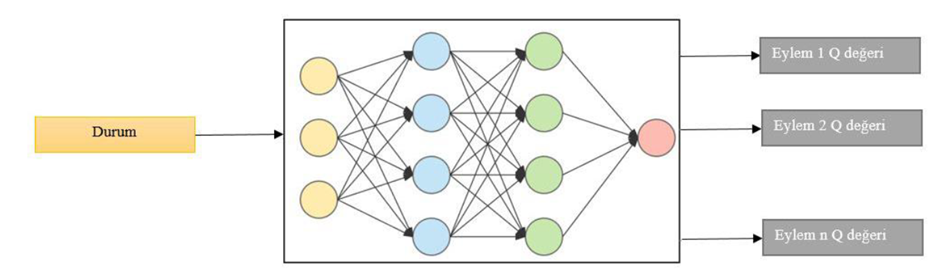
# Derin Q-ağ yapısı

    Bir durumun Q değeri, Bellman Eşitliği kullanılarak o durumda alınabilecek eylemler ve sonraki durumlardaki Q değerleri ile ilişkilendirilmektedir. Q değerini hesaplamak için Q değer fonksiyonu kullanılmaktadır. Daha sonra, ajan, verilen bir durumda, elde edebileceği en yüksek Q değerine sahip eylemi seçmektedir. Ajan, bu eylemi gerçekleştirerek ödül kazanmakta ve yeni bir duruma geçmektedir. Bu süreç, ajanın çevreyi keşfederek ve öğrenerek daha yüksek ödüller kazanmasını sağlamaktadır. Ödüller, ajanın yaptığı eylemlerin doğru veya yanlış olduğunu belirlemek için kullanılmaktadır. Ajan, doğru bir eylem gerçekleştirdiğinde pozitif bir ödül alırken, yanlış bir eylem gerçekleştirdiğinde ise negatif bir ödül almaktadır. Bu ödüller, ajanın optimal eylem seçimini öğrenmesini sağlamaktadır.

    Bu algoritmanın bir zorluğuna değinmek gerekirse; Derin Q-öğreneme algoritması implemente edilirken karşılanabilen en büyük zorluklardan birisi şudur: Q-fonksiyonunun tipik bir özellik olarak doğrusal olmaması ve birçok yerel minimum noktasına sahip olmasıdır. Bu durum, sinir ağının doğru Q-fonksiyonuna yaklaşmasını zorlaştırabilir. Bu gibi durumları kontrol edebilmek için, deneyim tekrarı ve hedef ağlar gibi çeşitli teknikler önerilmiştir.

    Deneyim tekrarı yani İngilizce adıyla experience replay tekniği şöyle işler. Ajanın deneyimlerinin bir alt kümesi (durum, eylem, ödül, bir sonraki durum) bir bellek tamponunda saklanır ve Q-fonksiyonunu güncellemek için bu tampondan örnek alınır. Bu işlem verilerin birbiriyle ilişkilendirilmesine ve öğrenme sürecinin daha istikrarlı hale gelmesine yardımcı olur. Öbür taraftan hedef ağlar İngilizce deyimiyle target networks, Q-fonksiyonu güncellemelerini stabilize etmek için kullanılır. Bu teknikte,ayrı bir ağ hedef Q değerlerini hesaplar ve daha sonra bu değerler Q-fonksiyon ağını güncellemek için kullanılır.

    DQN'lerin en büyük avantajlarından biri, çevreye doğrudan müdahale etmeden öğrenme yapabilme yeteneğidir. Yani bu, ajanın gerçek dünyada öğrenmesini sağlamadan önce simüle edilmiş bir ortamda eğitilebileceği anlamına gelmektedir. DQN'ler, bir ajanın bir ortamda hedeflenen bir davranışı öğrenmesine izin vermek için kullanılabilir. Bu özelliği sayesinde oyun oynama, robotik ve otonom araçlar da dahil olmak üzere çok çeşitli problemlere uygulanmıştır. Örneğin, Atari (bizim seçtiğimiz örnekte olduğu gibi) ve Go gibi oyunları oynayabilen ajanları eğitmek ve kavrama ve navigasyon gibi görevler için robotları kontrol etmek için kullanılmıştır.
Ve son olarak basitçe özetlemek gerekirse;
•	Derin Q-öğrenmesi bir pekiştirmeli öğrenme algoritmasıdır. (reinforcement learning)
•	Derin yapay sinir ağı kullanarak Q-fonksiyonuna yaklaşmaya çalışır.
•	Herkesin anlayabileceği şekilde amacı bir sonraki hareketleri inceleyip yapacağı hareketlere göre kazanacağı ödülü görmek ve bu ödülü maximize edip buna göre hareket etmektir.

REFERANSLAR:
1.	https://dergipark.org.tr/tr/pub/fumbd/issue/76699/1313906

2.	https://www.linkedin.com/pulse/deep-q-learning-dqn-madhavan-vivekanandan#:~:text=Here%20are%20some%20of%20the%20benefits%20of%20using%20Deep%20Q,of%20the%20state%20and%20action.


3.	https://medium.com/deep-learning-turkiye/q-learninge-giri%C5%9F-6742b3c5ed2b

4.	https://www.geeksforgeeks.org/deep-q-learning/


In [ ]:

import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import h5py
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
from keras import layers
from keras.models import load_model

import gymnasium as gym
from gymnasium.wrappers import AtariPreprocessing, FrameStack
import numpy as np

from keras.models import Sequential




# Configuration parameters for the whole setup
seed = 42
gamma = 0.99  # Discount factor for past rewards
epsilon = 0.05  # Epsilon greedy parameter
epsilon_min = 0.05  # Minimum epsilon greedy parameter
epsilon_max = 1.0  # Maximum epsilon greedy parameter
epsilon_interval = (
    epsilon_max - epsilon_min
)  # Rate at which to reduce chance of random action being taken
batch_size = 32  # Size of batch taken from replay buffer
max_steps_per_episode = 10000
max_episodes = 10  # Limit training episodes, will run until solved if smaller than 1

# Use the Atari environment
# Specify the `render_mode` parameter to show the attempts of the agent in a pop up window.
env = gym.make("BreakoutNoFrameskip-v4",mode = 4, render_mode="human")
# Environment preprocessing
env = AtariPreprocessing(env)
# Stack four frames
env = FrameStack(env, 4)
env.seed(seed)

num_actions = 4  # num_actions değişkenini tanımla

def create_q_model():
    # Network defined by the Deepmind paper
    return keras.Sequential(
        [
            layers.Lambda(
                lambda tensor: tf.transpose(tensor, [0, 2, 3, 1]),
                output_shape=(84, 84, 4),
                input_shape=(4, 84, 84),
            ),
            # Convolutions on the frames on the screen
            layers.Conv2D(32, 8, strides=4, activation="relu", input_shape=(4, 84, 84)),
            layers.Conv2D(64, 4, strides=2, activation="relu"),
            layers.Conv2D(64, 3, strides=1, activation="relu"),
            layers.Flatten(),
            layers.Dense(512, activation="relu"),
            layers.Dense(num_actions, activation="linear"),
        ]
    )
    
model = create_q_model()
model_target = create_q_model()
    

# Eğer daha önce model kaydedilmişse, onu yükle
if os.path.exists("breakout.weights.h5"):
    model.load_weights('breakout.weights.h5')
    model_target.load_weights('breakout.weights.h5')
    

if model is None and model_target is None:
    model = create_q_model()
    model_target = create_q_model()
    print("modeller yeniden oluştu (null kontrol)");

model.summary()
# In the Deepmind paper they use RMSProp however then Adam optimizer
# improves training time
optimizer = keras.optimizers.Adam(learning_rate=0.00025, clipnorm=1.0)

# Experience replay buffers
action_history = []
state_history = []
state_next_history = []
rewards_history = []
done_history = []
episode_reward_history = []
running_reward = 0
episode_count = 0
frame_count = 0
# Number of frames to take random action and observe output
epsilon_random_frames = 50000
# Number of frames for exploration
epsilon_greedy_frames = 1000000.0
# Maximum replay length
# Note: The Deepmind paper suggests 1000000 however this causes memory issues
max_memory_length = 1000000
# Train the model after 4 actions
update_after_actions = 4
# How often to update the target network
update_target_network = 10000
# Using huber loss for stability
loss_function = keras.losses.Huber()
printed_epsilon = False

while True:
    print("episod: ",episode_count)
    observation, _ = env.reset()
    state = np.array(observation)
    episode_reward = 0

    for timestep in range(1, max_steps_per_episode):
        frame_count += 1

        # Use epsilon-greedy for exploration
        if frame_count < epsilon_random_frames or epsilon > np.random.rand(1)[0]:
            # Take random action
            action = np.random.choice(num_actions)
        else:
            # Predict action Q-values
            # From environment state
            state_tensor = keras.ops.convert_to_tensor(state)
            state_tensor = keras.ops.expand_dims(state_tensor, 0)
            action_probs = model(state_tensor, training=False)
            # Take best action
            action = keras.ops.argmax(action_probs[0]).numpy()

        # Decay probability of taking random action
        epsilon -= epsilon_interval / epsilon_greedy_frames
        epsilon = max(epsilon, epsilon_min)

        # Apply the sampled action in our environment
        state_next, reward, done, _, _ = env.step(action)
        state_next = np.array(state_next)

        episode_reward += reward

        # Save actions and states in replay buffer
        action_history.append(action)
        state_history.append(state)
        state_next_history.append(state_next)
        done_history.append(done)
        rewards_history.append(reward)
        state = state_next

        # Update every fourth frame and once batch size is over 32
        if frame_count % update_after_actions == 0 and len(done_history) > batch_size:
            # Get indices of samples for replay buffers
            indices = np.random.choice(range(len(done_history)), size=batch_size)

            # Using list comprehension to sample from replay buffer
            state_sample = np.array([state_history[i] for i in indices])
            state_next_sample = np.array([state_next_history[i] for i in indices])
            rewards_sample = [rewards_history[i] for i in indices]
            action_sample = [action_history[i] for i in indices]
            done_sample = keras.ops.convert_to_tensor(
                [float(done_history[i]) for i in indices]
            )

            # Build the updated Q-values for the sampled future states
            # Use the target model for stability
            future_rewards = model_target.predict(state_next_sample)
            # Q value = reward + discount factor * expected future reward
            updated_q_values = rewards_sample + gamma * keras.ops.amax(
                future_rewards, axis=1
            )

            # If final frame set the last value to -1
            updated_q_values = updated_q_values * (1 - done_sample) - done_sample

            # Create a mask so we only calculate loss on the updated Q-values
            masks = keras.ops.one_hot(action_sample, num_actions)

            with tf.GradientTape() as tape:
                # Train the model on the states and updated Q-values
                q_values = model(state_sample)

                # Apply the masks to the Q-values to get the Q-value for action taken
                q_action = keras.ops.sum(keras.ops.multiply(q_values, masks), axis=1)
                # Calculate loss between new Q-value and old Q-value
                loss = loss_function(updated_q_values, q_action)

            # Backpropagation
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if episode_count % 2 == 0 and not printed_epsilon:
            print("Epsilon value:", epsilon)
            printed_epsilon = True

        if frame_count % update_target_network == 0:
            # update the the target network with new weights
            model_target.set_weights(model.get_weights())
            # Log details
            template = "running reward: {:.2f} at episode {}, frame count {}"
            model.save_weights('breakout.weights.h5')
            
            print(template.format(running_reward, episode_count, frame_count))

        # Limit the state and reward history
        if len(rewards_history) > max_memory_length:
            del rewards_history[:1]
            del state_history[:1]
            del state_next_history[:1]
            del action_history[:1]
            del done_history[:1]

        if done:
            break

    # Update running reward to check condition for solving
    episode_reward_history.append(episode_reward)
    if len(episode_reward_history) > 100:
        del episode_reward_history[:1]
    running_reward = np.mean(episode_reward_history)

    episode_count += 1
    printed_epsilon = False
    if running_reward > 40:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        print("Eğitim durduruldu. Model kaydediliyor...")
        model.save_weights('breakout.weights.h5')         
        break

    if (
        max_episodes > 0 and episode_count >= max_episodes
    ):  # Maximum number of episodes reached
        print("Stopped at episode {}!".format(episode_count))
        print("Eğitim durduruldu. Model kaydediliyor...")
        model.save_weights('breakout.weights.h5')  
        break



2.16.1


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.seed to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.seed` for environment variables or `env.get_wrapper_attr('seed')` that will search the reminding wrappers.
  logger.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inste

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 84, 84, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 20, 20, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 64)            │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,686,180 (6.43 MB)

 Trainable params: 1,686,180 (6.43 MB)

 Non-trainable params: 0 (0.00 B)

episod:  0
Epsilon value: 0.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━